### Practical 3:- Feature Transformation (Any one)
####A. To use PCA Algorithm for dimensionality reduction.
####You have a dataset that includes measurements for different variables on wine
####(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
####so that most variations in the measurements of the variables are captured by a small
####number of principal components so that it is easier to distinguish between red and
####white wine by inspecting these principal components.
Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
oData = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv')

In [24]:
# Reading the data
oData.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
# checking the shape of the dataset and other info
def overview(oData):
  print("\n\nData info:-")
  print(oData.info())
  print("\n\nData describe:-")
  print(oData.describe())
  print("\n\nData shape:-")
  print(oData.shape)
  print("\n\n Data total null")
  print(oData.isnull().sum())
  print("\n\n total duplicate")
  print(oData.duplicated().sum())

In [6]:
overview(oData)



Data info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


Data d

#### Abve exxecution show that there is no any null and duplicated data in dataset

In [7]:
# checking the outliyer
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

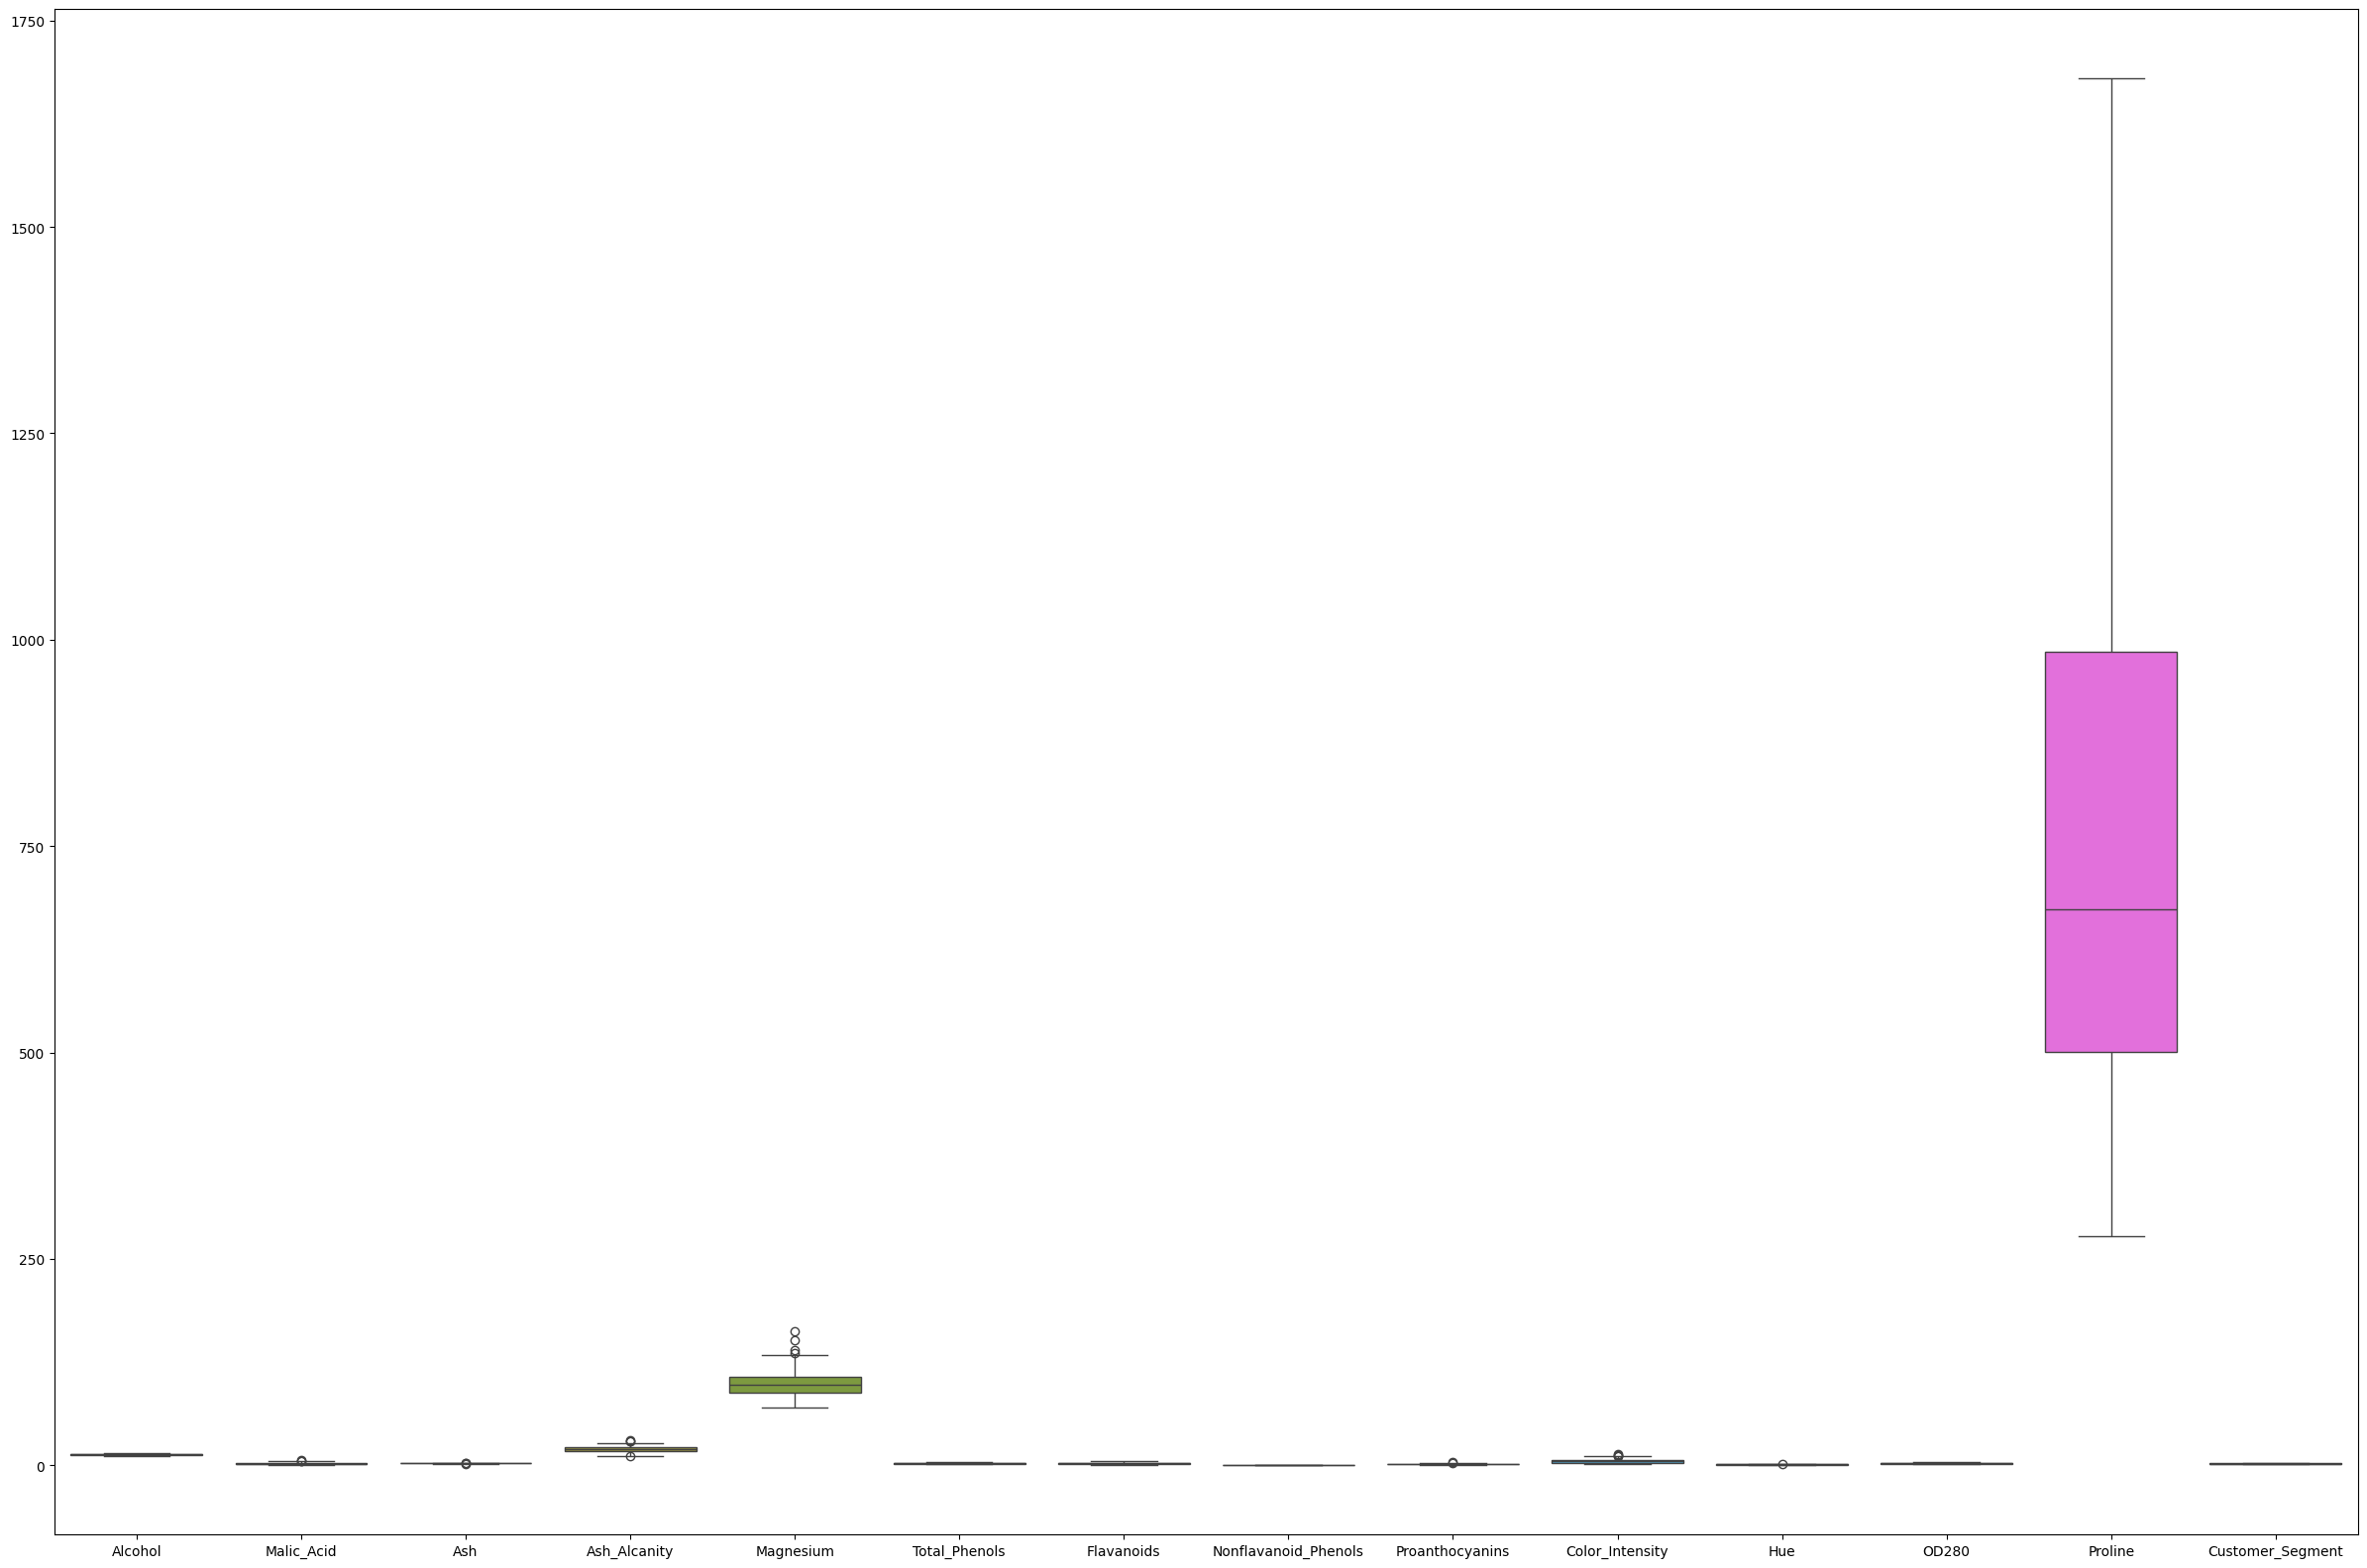

In [8]:
plt.figure(figsize=(30,20))
sns.boxplot(data=oData)

In [9]:
def cehckOutlier(oData):
  Q1 = oData.quantile(0.25)
  Q3 = oData.quantile(0.75)
  IQR = Q3 - Q1
  IQR_outlier = (oData < (Q1 - 1.5 * IQR)) |(oData > (Q3 + 1.5 *IQR))
  return IQR_outlier

In [10]:
checkOutlier_data = cehckOutlier(oData)
checkOutlier_data.sum()

,0
Alcohol,0
Malic_Acid,3
Ash,3
Ash_Alcanity,4
Magnesium,4
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,2
Color_Intensity,4


In [11]:
def remove_outliers_iqr(df):
  """
  Removes outliers from a pandas DataFrame using the IQR method.

  Args:
    df: The input pandas DataFrame.

  Returns:
    A pandas DataFrame with outliers removed.
  """
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_cleaned

In [12]:
# removing the outliers
oData = remove_outliers_iqr(oData)

In [13]:
overview(oData)



Data info:-
<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               161 non-null    float64
 1   Malic_Acid            161 non-null    float64
 2   Ash                   161 non-null    float64
 3   Ash_Alcanity          161 non-null    float64
 4   Magnesium             161 non-null    int64  
 5   Total_Phenols         161 non-null    float64
 6   Flavanoids            161 non-null    float64
 7   Nonflavanoid_Phenols  161 non-null    float64
 8   Proanthocyanins       161 non-null    float64
 9   Color_Intensity       161 non-null    float64
 10  Hue                   161 non-null    float64
 11  OD280                 161 non-null    float64
 12  Proline               161 non-null    int64  
 13  Customer_Segment      161 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 18.9 KB
None


Data descri

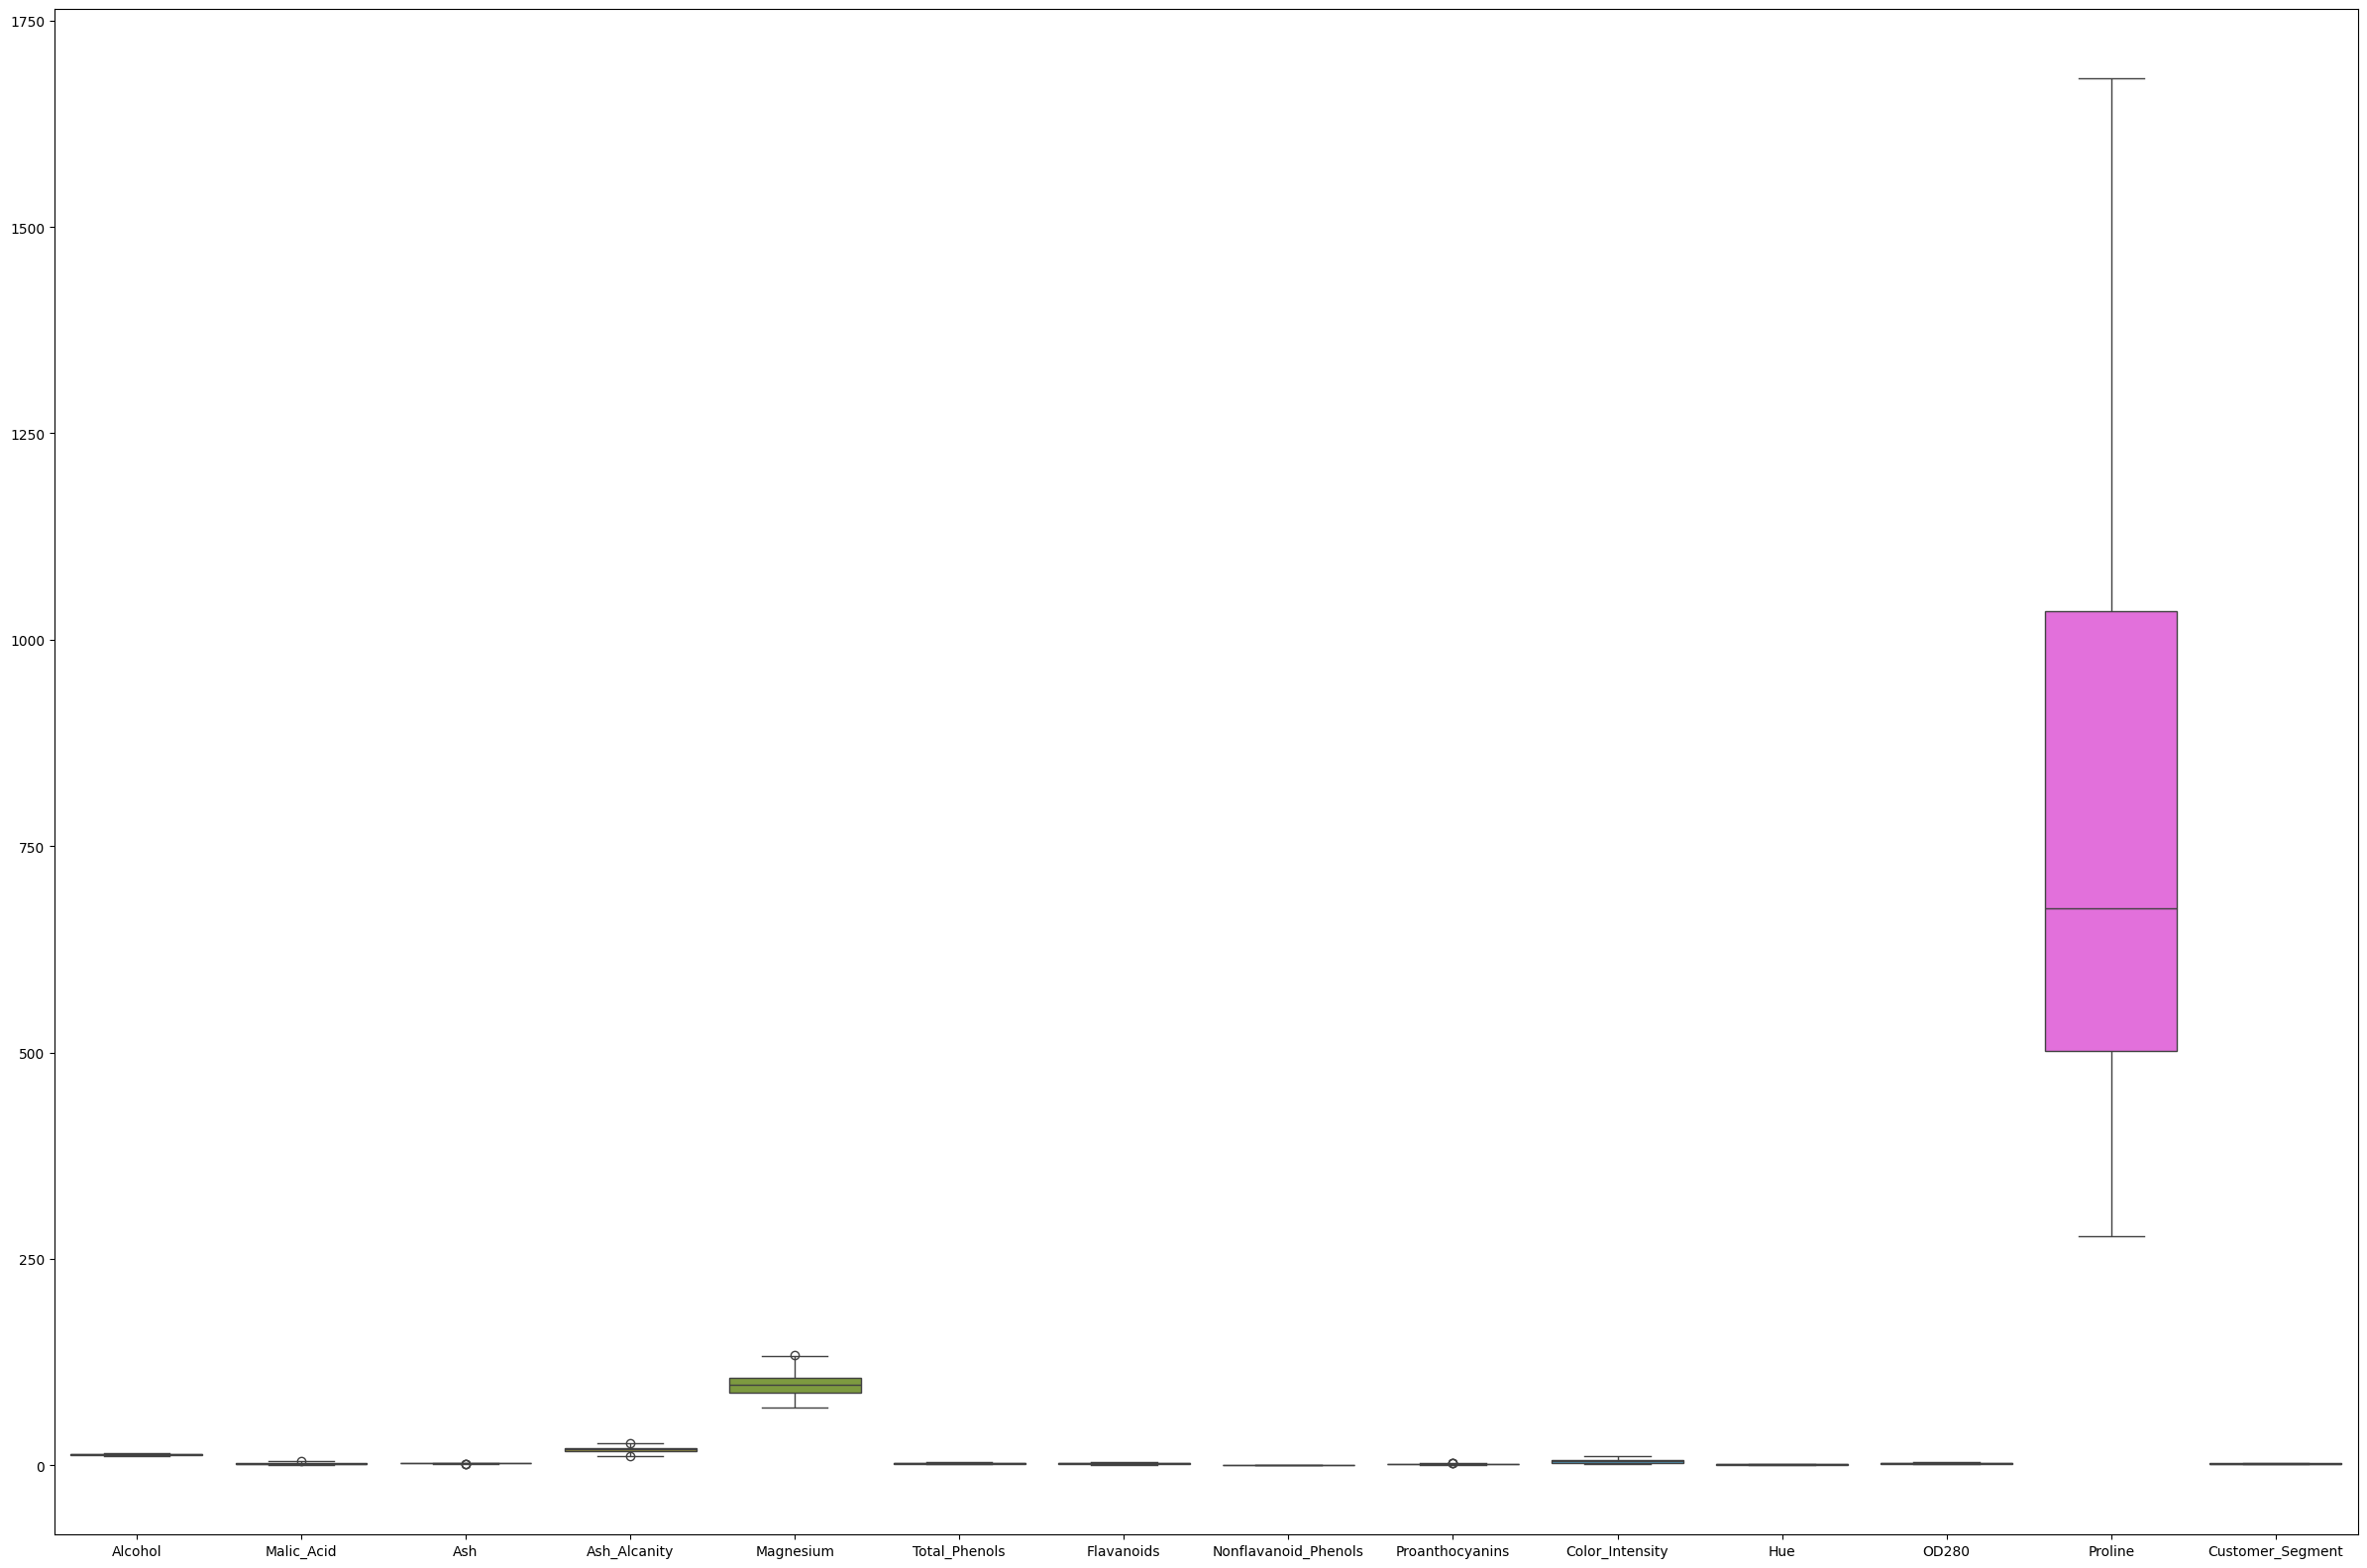

In [14]:
plt.figure(figsize=(30,20))
sns.boxplot(data=oData)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

**Reasoning**:
Separate the features (X) from the target variable (y).



In [16]:
X = oData.drop('Customer_Segment', axis=1)
y = oData['Customer_Segment']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Apply pca

### Subtask:
Perform PCA on the scaled data, determining the number of components to retain.


**Reasoning**:
Perform PCA on the scaled data, determine the number of components to retain, and then fit a new PCA model with the selected number of components.



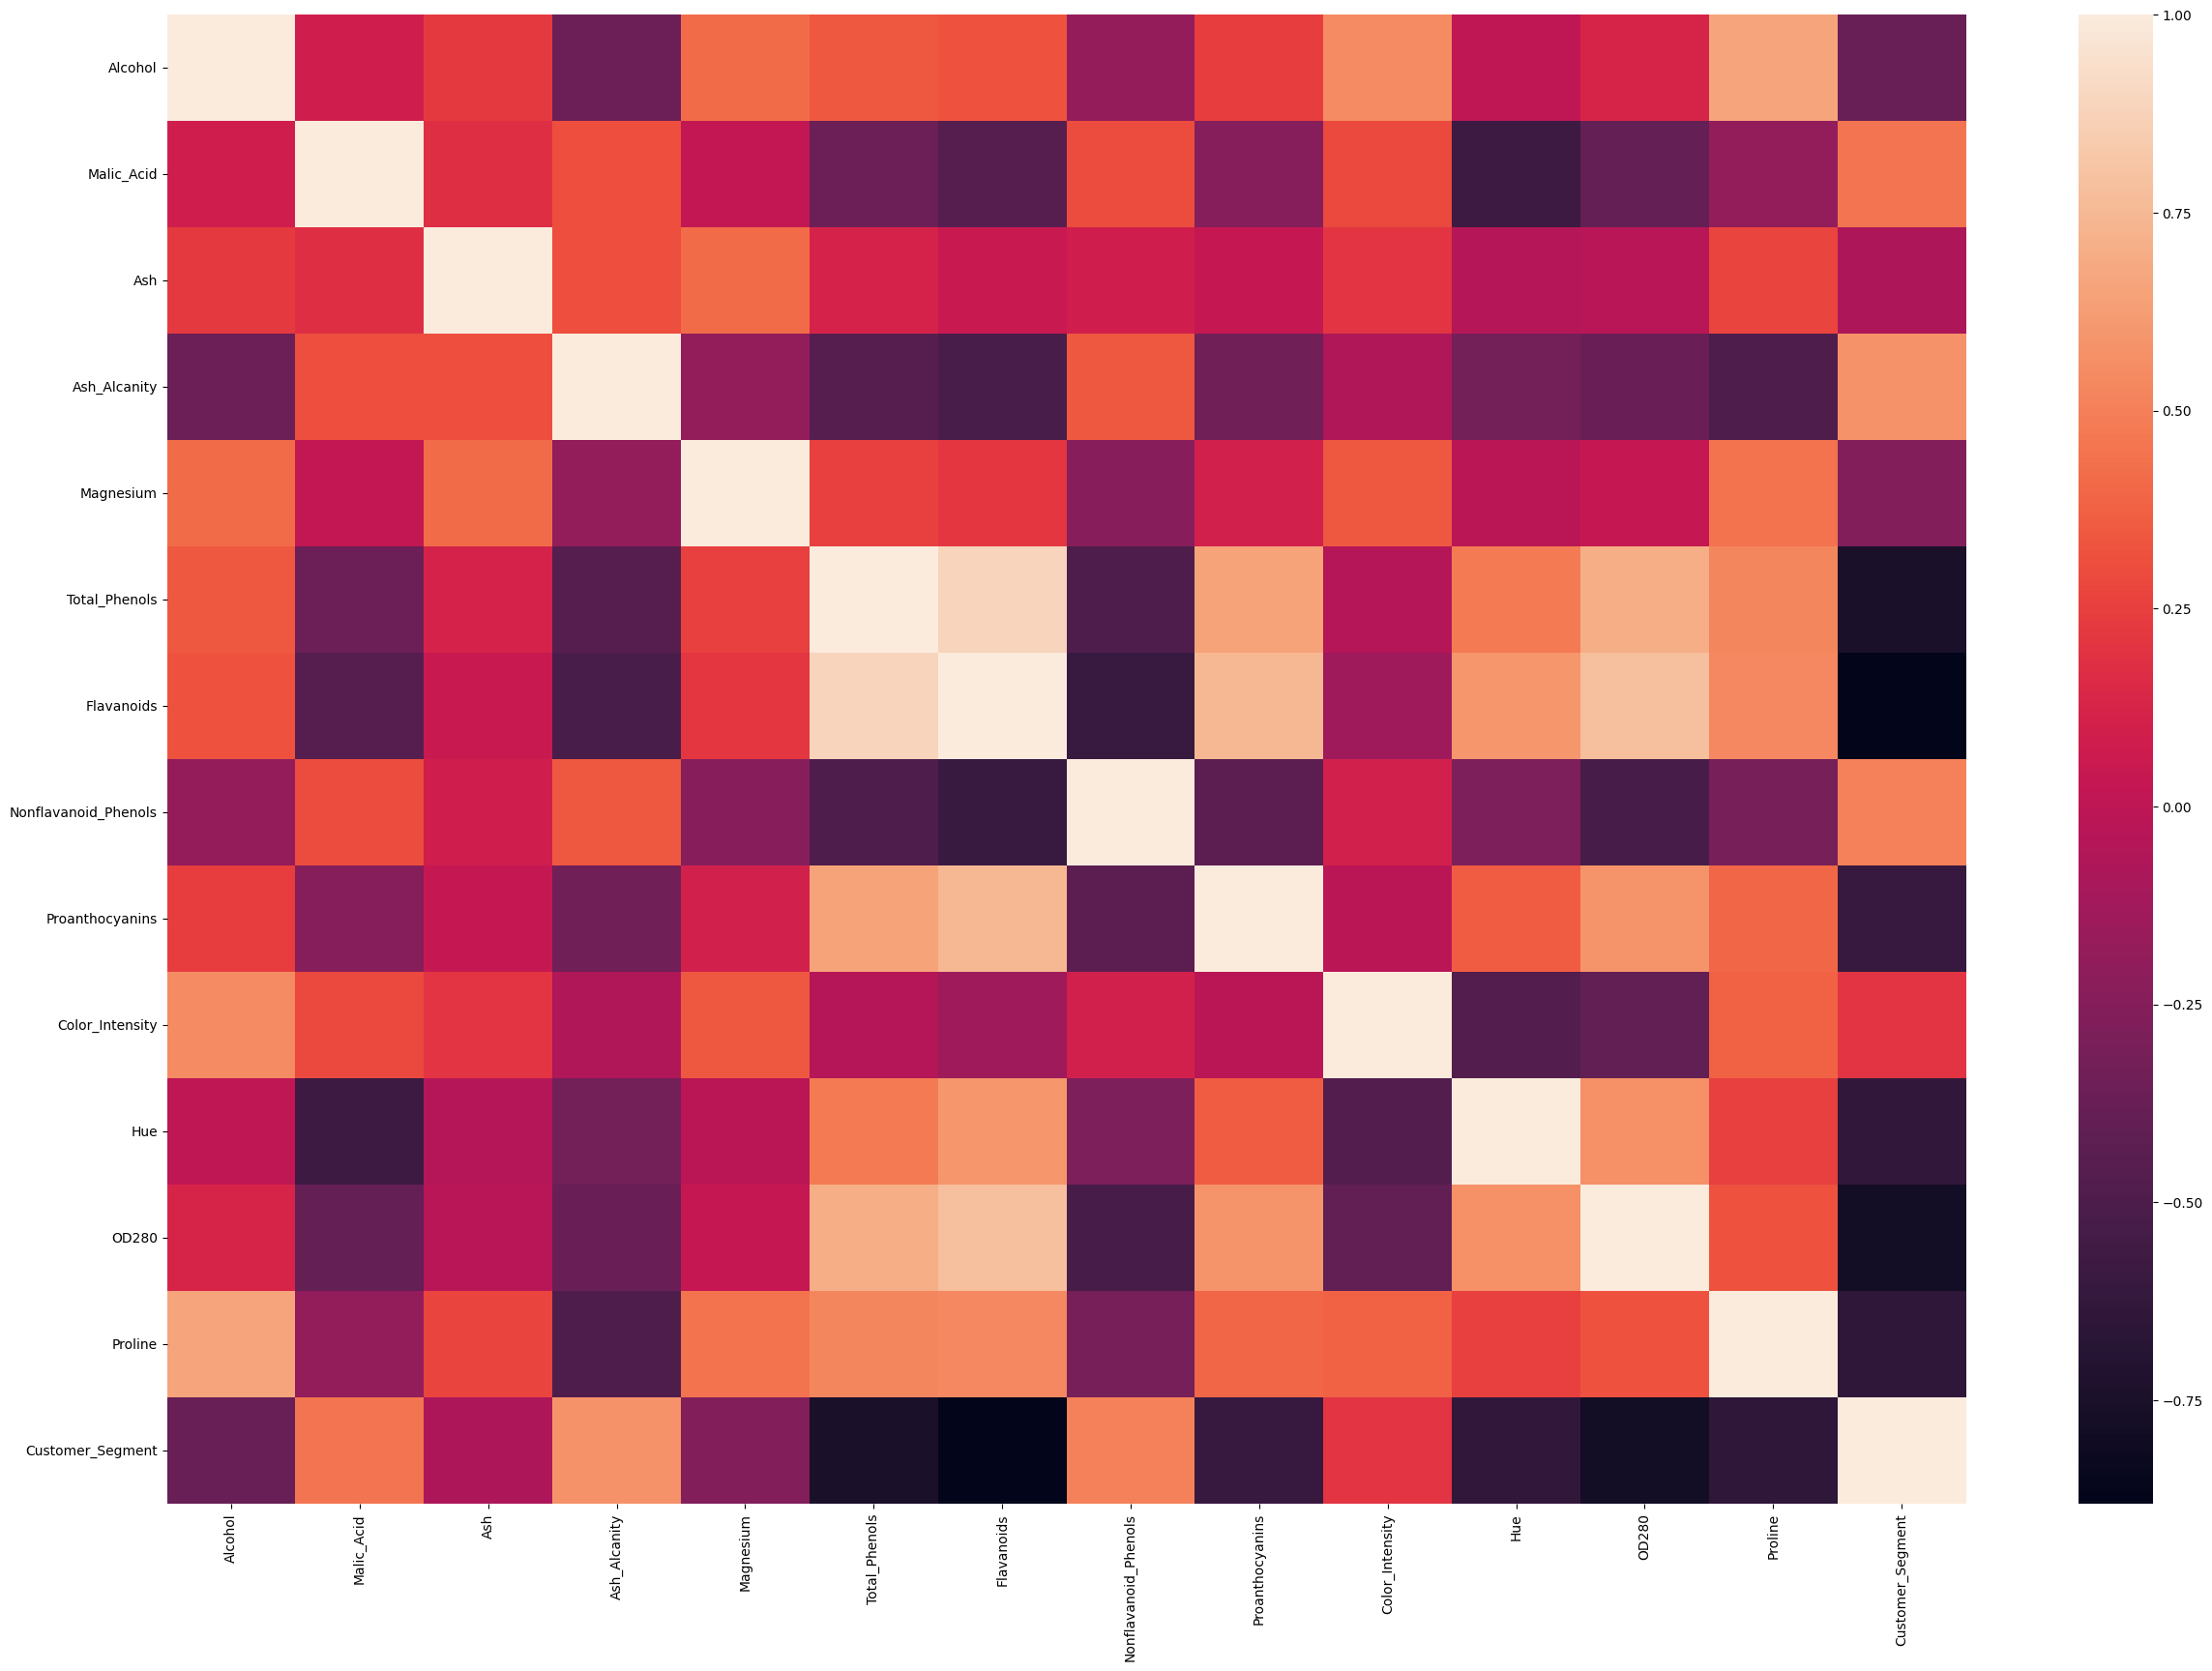

In [19]:
plt.figure(figsize=(30,20))
sns.heatmap(data=oData.corr())
plt.show()

In [20]:
# pca = PCA()
# x_data = pca.fit(X_scaled)
# cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print(cumulative_explained_variance)
# n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
# print(n_components)
pca_final = PCA(n_components=2)
oResult = pca_final.fit(X_scaled)
print(oResult)

PCA(n_components=2)


## Transform the data

### Subtask:
Transform the original data into the principal components.


**Reasoning**:
Apply the fitted PCA model to the scaled feature data.



In [21]:
X_pca = pca_final.transform(X_scaled)

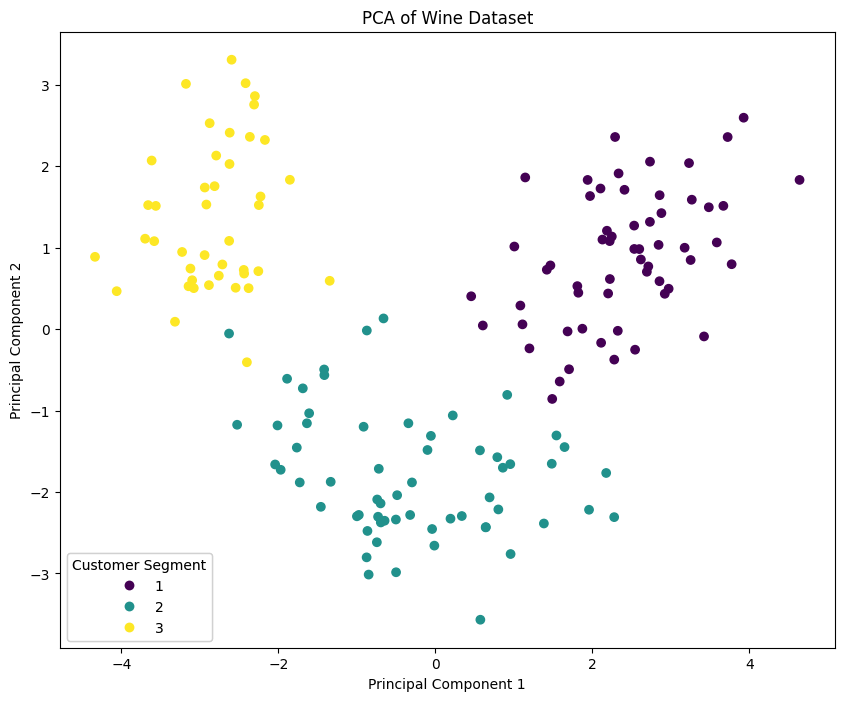

In [22]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Customer Segment")
plt.gca().add_artist(legend1)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on PCA-transformed data: {accuracy}")

Accuracy of Logistic Regression on PCA-transformed data: 0.9696969696969697
